# Seminar - JSON, XML, Requests, Web-Scraping 
by Vítek Macháček

## Task 1: JSON API and Quandl

Quandl access credentials are stored in `secret.py` which you have to create by yourself as it is not on GitHub. Create account on Quandl, generate API key and save it as `QUANDL_API_KEY` variable

In [48]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
qkey="jApqNfBidfroAxhDXcHs"

### 1a. Request Quandl for time series `FB` from `WIKI` database. Use JSON format.

Hint: https://www.quandl.com/api/v3/datasets/{QUANDL_DATABASE}/{QUANDL_DATASET}/data.{DATA_FORMAT}?api_key={YOUR-QUANDL-API-KEY}

Use GET

In [11]:
data1 = requests.get(f"https://www.quandl.com/api/v3/datasets/WIKI/FB/data.json?api_key={qkey}")

In [12]:
data1

<Response [200]>

### 1b. convert response to some python-friendly format

Ideally `list` or `dict`

In [181]:
jsondata=data1.json()
jsondata

{'dataset_data': {'limit': None,
  'transform': None,
  'column_index': None,
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Volume',
   'Ex-Dividend',
   'Split Ratio',
   'Adj. Open',
   'Adj. High',
   'Adj. Low',
   'Adj. Close',
   'Adj. Volume'],
  'start_date': '2012-05-18',
  'end_date': '2018-03-27',
  'frequency': 'daily',
  'data': [['2018-03-27',
    156.31,
    162.85,
    150.75,
    152.19,
    76787884.0,
    0.0,
    1.0,
    156.31,
    162.85,
    150.75,
    152.19,
    76787884.0],
   ['2018-03-26',
    160.82,
    161.1,
    149.02,
    160.06,
    125438294.0,
    0.0,
    1.0,
    160.82,
    161.1,
    149.02,
    160.06,
    125438294.0],
   ['2018-03-23',
    165.44,
    167.1,
    159.02,
    159.39,
    52306891.0,
    0.0,
    1.0,
    165.44,
    167.1,
    159.02,
    159.39,
    52306891.0],
   ['2018-03-22',
    166.13,
    170.27,
    163.72,
    164.89,
    73389988.0,
    0.0,
    1.0,
    166.13,
    170.27,
    163.72,


### 1c. Explore response structure

* hierarchical JSON structure
* Where are the data
* Column names

In [17]:
dataset = pd.DataFrame(jsondata["dataset_data"]["data"],columns=jsondata["dataset_data"]["column_names"])
dataset


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,156.31,162.85,150.75,152.1900,76787884.0,0.0,1.0,156.31,162.85,150.75,152.1900,76787884.0
1,2018-03-26,160.82,161.10,149.02,160.0600,125438294.0,0.0,1.0,160.82,161.10,149.02,160.0600,125438294.0
2,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0
3,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
4,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0


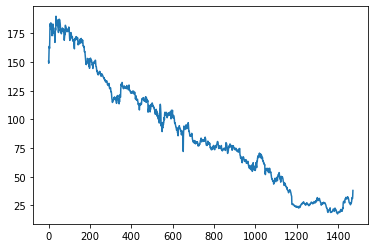

In [37]:
plot1 = dataset["Low"].plot()

### 1d. Let's do a DataFrame

Perhaps column names can be useful

### 1e. Suggest function structure of downloading script and implement it

In [177]:
database = "WIKI"
dataset="FB"
key=qkey

In [179]:
def download_json(database, dataset, key):
    data=requests.get(f"https://www.quandl.com/api/v3/datasets/{database}/{dataset}/data.json?api_key={qkey}")
    jsondata=data.json()
    datatable = pd.DataFrame(jsondata["dataset_data"]["data"],columns=jsondata["dataset_data"]["column_names"])
    return(datatable)


In [180]:
download_json("WIKI","FB",qkey)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,156.31,162.85,150.75,152.1900,76787884.0,0.0,1.0,156.31,162.85,150.75,152.1900,76787884.0
1,2018-03-26,160.82,161.10,149.02,160.0600,125438294.0,0.0,1.0,160.82,161.10,149.02,160.0600,125438294.0
2,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0
3,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
4,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0


## Task 2: XML (not covered on seminar)
Request XML format of the same dataset and do the same

In [182]:
data2 = requests.get(f"https://www.quandl.com/api/v3/datasets/WIKI/FB/data.xml?api_key={qkey}")
data2

<Response [200]>

Let just save a XML into a file `xml_sample.xml`

In [49]:
data2.content

b'<?xml version="1.0" encoding="UTF-8"?>\n<quandl-response>\n  <dataset-data>\n    <limit nil="true"/>\n    <transform nil="true"/>\n    <column-index nil="true"/>\n    <column-names type="array">\n      <column-name>Date</column-name>\n      <column-name>Open</column-name>\n      <column-name>High</column-name>\n      <column-name>Low</column-name>\n      <column-name>Close</column-name>\n      <column-name>Volume</column-name>\n      <column-name>Ex-Dividend</column-name>\n      <column-name>Split Ratio</column-name>\n      <column-name>Adj. Open</column-name>\n      <column-name>Adj. High</column-name>\n      <column-name>Adj. Low</column-name>\n      <column-name>Adj. Close</column-name>\n      <column-name>Adj. Volume</column-name>\n    </column-names>\n    <start-date type="date">2012-05-18</start-date>\n    <end-date type="date">2018-03-27</end-date>\n    <frequency>daily</frequency>\n    <data type="array">\n      <datum type="array">\n        <datum type="date">2018-03-27</dat

get BeatifulSoup object

In [56]:
soup = BeautifulSoup(data2.content)
soup

<?xml version="1.0" encoding="UTF-8"?><html><body><quandl-response>
<dataset-data>
<limit nil="true"></limit>
<transform nil="true"></transform>
<column-index nil="true"></column-index>
<column-names type="array">
<column-name>Date</column-name>
<column-name>Open</column-name>
<column-name>High</column-name>
<column-name>Low</column-name>
<column-name>Close</column-name>
<column-name>Volume</column-name>
<column-name>Ex-Dividend</column-name>
<column-name>Split Ratio</column-name>
<column-name>Adj. Open</column-name>
<column-name>Adj. High</column-name>
<column-name>Adj. Low</column-name>
<column-name>Adj. Close</column-name>
<column-name>Adj. Volume</column-name>
</column-names>
<start-date type="date">2012-05-18</start-date>
<end-date type="date">2018-03-27</end-date>
<frequency>daily</frequency>
<data type="array">
<datum type="array">
<datum type="date">2018-03-27</datum>
<datum type="float">156.31</datum>
<datum type="float">162.85</datum>
<datum type="float">150.75</datum>
<datum

OK gimme a dataframe

In [106]:
maladata=soup.find("data").find("datum",{"type":"array"}).findAll("datum")
maladata


[<datum type="date">2018-03-27</datum>,
 <datum type="float">156.31</datum>,
 <datum type="float">162.85</datum>,
 <datum type="float">150.75</datum>,
 <datum type="float">152.19</datum>,
 <datum type="float">76787884.0</datum>,
 <datum type="float">0.0</datum>,
 <datum type="float">1.0</datum>,
 <datum type="float">156.31</datum>,
 <datum type="float">162.85</datum>,
 <datum type="float">150.75</datum>,
 <datum type="float">152.19</datum>,
 <datum type="float">76787884.0</datum>]

In [122]:
sloupce=soup.findAll("column-name")
sloupce
len(sloupce)
jmenasloupcu=[]
for i in sloupce:
    jmenasloupcu.append(i.text)
jmenasloupcu

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [100]:
velkadata=soup.find("data").findAll("datum",{"type":"array"})
velkadata

[<datum type="array">
 <datum type="date">2018-03-27</datum>
 <datum type="float">156.31</datum>
 <datum type="float">162.85</datum>
 <datum type="float">150.75</datum>
 <datum type="float">152.19</datum>
 <datum type="float">76787884.0</datum>
 <datum type="float">0.0</datum>
 <datum type="float">1.0</datum>
 <datum type="float">156.31</datum>
 <datum type="float">162.85</datum>
 <datum type="float">150.75</datum>
 <datum type="float">152.19</datum>
 <datum type="float">76787884.0</datum>
 </datum>,
 <datum type="array">
 <datum type="date">2018-03-26</datum>
 <datum type="float">160.82</datum>
 <datum type="float">161.1</datum>
 <datum type="float">149.02</datum>
 <datum type="float">160.06</datum>
 <datum type="float">125438294.0</datum>
 <datum type="float">0.0</datum>
 <datum type="float">1.0</datum>
 <datum type="float">160.82</datum>
 <datum type="float">161.1</datum>
 <datum type="float">149.02</datum>
 <datum type="float">160.06</datum>
 <datum type="float">125438294.0</datum>

In [123]:
tabulka=[]
for h in velkadata:
    radek=[]
    for i in maladata:
        radek.append(i.text)
    tabulka.append(radek)
df=pd.DataFrame(tabulka,columns=jmenasloupcu)  
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
1,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
3,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
4,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
1468,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
1469,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
1470,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0


## Task 3: Quandl website

Let's get a list of available datasets on Quandl:

The list of datasets on Quandl website is available at: https://www.quandl.com/search

Is this website scrapable? 

## Task 4: Scraping IES news

use following code snippets to construct your own IES News web scraper

In [ ]:
def get_soup(link):
    '''
    Function accepts a link and returns a BeautifulSoup object parsed from text of a succesful GET request on a link. If requests returns other status code than 200, returns None and prints a message

    Make sure that the request object is parsed as UTF-8 string.
    '''
    r = requests.get(link,encoding='UTF-8')
    pass

In [ ]:
def get_all_news_links(link):
    '''
    Generates list of URLs of all news-related links from the url provided.

    Links on news format: <a href="/en/news/{id}" title="show news" class="show-news">show news</a>

    The URLs are expected in absolute format, i.e. including a full domain.
    '''
    pass
    
news_links = get_all_news_links('https://ies.fsv.cuni.cz/content/tree/index/lang/en')
news_links

In [ ]:
def parse_title(soup):
    '''
    Parse text of the first `h3` object from the soup element.
    '''
    pass

In [ ]:
def parse_date(soup):
    '''
    Parse text of the sibling of sibling of the first h3 element in the soup. Note that the immidiate sibling of `h3` is not Tag element, but NavigableString. This is used to represent text between tags.
    '''
    pass
    

In [ ]:
def parse_news_content(soup):
    '''
    For simplicity, the content of the article is the content of all <p> elements within <div class="col-sm-12 news"></div>

    Return a single string with the whole text. Use `/n` as a connecting string between individual p-texts. 

    Hint: Consider using a `.join()` function applicable on string object
    '''
    
    pass
    
print(parse_news_content(get_soup('https://ies.fsv.cuni.cz/en/news/4976')))

In [ ]:
def parse_ies_news(link,pause=.5):
    '''
    From URL of given news story generate pd.Series object with `title`, `date` and `content`.

    Use functions `parse_title`, `parse_date` and `parse_news_content` to get individual attributes.

    Please, keep the sleep() to prevent overflow of IES website.
    '''

    time.sleep(pause)
    
    pass
    
parse_ies_news('https://ies.fsv.cuni.cz/en/news/4976')

In [ ]:
def get_all_news(link):
    '''
    wraping fuction that accepts a `link` pointing towards hub website with links to parse and returing a dataframe containing all the links
    '''
    
    pass
df = get_all_news('https://ies.fsv.cuni.cz/content/tree/index/lang/en')

In [141]:
html1 = requests.get("https://ies.fsv.cuni.cz/en/node/48")
soup2 = BeautifulSoup(html1.content)
soup2

<!DOCTYPE html>
<!--[if lte IE 7]> <html class="no-js ie7" lang="en"> <![endif]--><!--[if IE 8]>     <html class="no-js ie8" lang="en"> <![endif]--><!--[if IE 9]>     <html class="no-js ie9" lang="en"> <![endif]--><!--[if !IE]><!--><html class="no-js" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="en" http-equiv="Content-Language"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="Global" name="document-distribution"/>
<meta content="Public" name="cache-control"/>
<meta content="eControl by Motion Media" name="generator"/>
<meta content="IES - Institute of economics studies" name="author"/>
<meta content="IES - Institute of economics studies" name="copyright"/>
<meta content="IES - Institute of economics studies" name="description"/>
<meta content="IES,institute,social,economics,cuni,charles,university" name="keywords"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<tit

In [151]:
a = soup2.findAll("td",{"class":"peopleTableCellName"})
a

[<td class="peopleTableCellName">
 <a href="/en/staff/barunik"><b>doc. PhDr. Jozef Baruník Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/bauerm"><b>doc. PhDr. Michal Bauer Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/baxajaromir"><b>PhDr. Jaromír Baxa Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/bertoli"><b>doc. Paola Bertoli M.A., MSc., Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/antosova"><b>PhDr. Lucie Bryndová </b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/cahlik"><b>doc. Ing. Tomáš Cahlík CSc.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/fcech"><b>PhDr. František Čech Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/cervinka"><b>RNDr. Michal Červinka Ph.D.</b></a>
 </td>,
 <td class="peopleTableCellName">
 <a href="/en/staff/chytilova"><b>doc. PhDr. Julie Chytilová Ph.D.</b></a>
 </td

In [152]:
b= soup2.findAll("td",{"class":"peopleTableCellAcf"})
b

[<td class="peopleTableCellAcf">
                                                                 Associate Professor
 
                           </td>,
 <td class="peopleTableCellAcf">
                                                                 Associate Professor
 
                           </td>,
 <td class="peopleTableCellAcf">
                                                                 Assistant Professor
 
                           </td>,
 <td class="peopleTableCellAcf">
                                                                 Research Fellow
 
                           </td>,
 <td class="peopleTableCellAcf">
                                                                 Adjunct Lecturer, Research Fellow
 
                           </td>,
 <td class="peopleTableCellAcf">
                                                                 Vice Dean for Graduate Studies, Associate Professor
 
                           </td>,
 <td class="peopleTableCellAcf">
 

In [160]:
teachers =[]
for i in a:
    teachers.append(i.text.strip())
teachers


['doc. PhDr. Jozef Baruník Ph.D.',
 'doc. PhDr. Michal Bauer Ph.D.',
 'PhDr. Jaromír Baxa Ph.D.',
 'doc. Paola Bertoli M.A., MSc., Ph.D.',
 'PhDr. Lucie Bryndová',
 'doc. Ing. Tomáš Cahlík CSc.',
 'PhDr. František Čech Ph.D.',
 'RNDr. Michal Červinka Ph.D.',
 'doc. PhDr. Julie Chytilová Ph.D.',
 'prof. Ing. Oldřich Dědek CSc.',
 'doc. PhDr. Ing. Antonie Doležalová Ph.D.',
 'doc. PhDr. Adam Geršl Ph.D.',
 'doc. PhDr. Martin Gregor Ph.D.',
 'doc. PhDr. Tomáš Havránek Ph.D.',
 'doc. PhDr. Zuzana Havránková Ph.D.',
 'PhDr. Michal Hlaváček Ph.D.',
 'Ing. Monika Hollmannová',
 'doc. Mgr. Tomáš Holub Ph.D.',
 'prof. Roman Horváth Ph.D.',
 'doc. PhDr. Ing. Ing. Petr Jakubík Ph.D. Ph.D.',
 'prof. Ing. Karel Janda M.A., Dr., Ph.D.',
 'doc. Petr Janský Ph.D.',
 'Ing. Irena Kemény',
 'prof. Ing. Evžen Kočenda M.A., Ph.D., DSc.',
 'prof. Ing. et Ing. Luboš Komárek Ph.D., MSc., MBA',
 'prof. PhDr. Ladislav Krištoufek Ph.D.',
 'PhDr. Jiří Kukačka Ph.D.',
 'Jiří Novák M.Sc., Ph.D., Deloitte Corporate 

In [157]:
ranks = []
for j in b:
    ranks.append(j.text.strip())
ranks

['Associate Professor',
 'Associate Professor',
 'Assistant Professor',
 'Research Fellow',
 'Adjunct Lecturer, Research Fellow',
 'Vice Dean for Graduate Studies, Associate Professor',
 'Assistant Professor',
 'Senior Lecturer',
 'Associate Professor, Head of Department of Institutional Economics, Director of Undergraduate Studies',
 'Professor',
 'Senior Lecturer',
 'Associate Professor, Director of Master Studies',
 'Director, Associate Professor',
 'Associate Professor',
 'Associate Professor',
 'Senior Lecturer',
 'Senior Lecturer, Chief Administrator',
 'Associate Professor',
 'Professor, Head of Department of Macroeconomics and Econometrics, Director for Research',
 'Associate Professor',
 'Professor, Head of Department of Microeconomics',
 'Associate Professor, Head of Department of European Economic Integration and Economic Policy',
 'Senior Lecturer',
 'Professor, Head of Department of Finance, Director of Graduate Studies',
 'Professor',
 'Vice-Dean for Student Affairs, Prof

In [176]:
tabulka2=[teachers,ranks]
pdtabulka2=pd.DataFrame(tabulka2,)
pdtabulka2 =pdtabulka2.T
pdtabulka2.columns = ["Name","Rank"]
pdtabulka2


,Name,Rank
0,doc. PhDr. Jozef Baruník Ph.D.,Associate Professor
1,doc. PhDr. Michal Bauer Ph.D.,Associate Professor
2,PhDr. Jaromír Baxa Ph.D.,Assistant Professor
3,"doc. Paola Bertoli M.A., MSc., Ph.D.",Research Fellow
4,PhDr. Lucie Bryndová,"Adjunct Lecturer, Research Fellow"
5,doc. Ing. Tomáš Cahlík CSc.,"Vice Dean for Graduate Studies, Associate Prof..."
6,PhDr. František Čech Ph.D.,Assistant Professor
7,RNDr. Michal Červinka Ph.D.,Senior Lecturer
8,doc. PhDr. Julie Chytilová Ph.D.,"Associate Professor, Head of Department of Ins..."
9,prof. Ing. Oldřich Dědek CSc.,Professor


## Task 5: Convert Task 4 into OOP

In [ ]:
class News:
    def __init__(self,link):
        pass




class Downloader:
    def __init__(self,hub_url):
        pass


#dl = Downloader('https://ies.fsv.cuni.cz/content/tree/index/lang/en')
